In [1]:
import pandas as pd

In [3]:
df_kunjungan = pd.read_csv("kunjungan_dokter_gigi_kota_x.csv", sep=',', index_col=0)
print("\n\nukuran df_penjualan:", df_kunjungan.shape)
df_kunjungan.head()



ukuran df_penjualan: (24, 3)


,Bulan,Tahun,tingkat kunjungan ke dokter gigi
0,1,2018,37
1,2,2018,32
2,3,2018,56
3,4,2018,43
4,5,2018,52


In [4]:
df_penjualan = pd.read_csv("tingkat_penjualan_kota_x.csv", sep=',', index_col=0)
print("\n\nukuran df_penjualan:", df_penjualan.shape)
df_penjualan.head()



ukuran df_penjualan: (24, 6)


,No,Bulan,Tahun,penjualan permen,penjualan sereal,penjualan buah pisang
0,1,1,2018,200661,10324,112146
1,2,2,2018,297141,13150,175417
2,3,3,2018,235586,5398,104645
3,4,4,2018,299498,7609,112283
4,5,5,2018,395824,5190,137083


In [7]:
str_bulan = lambda x : "0"+str(x) if x<10 else str(x)
df_kunjungan["Periode"] = df_kunjungan["Tahun"].map(str) + "-" + df_kunjungan["Bulan"].map(str_bulan)
df_penjualan["Periode"] = df_penjualan["Tahun"].map(str) + "-" + df_penjualan["Bulan"].map(str_bulan)

df_kunjungan.drop(columns=["Tahun","Bulan"], inplace=True)
df_penjualan.drop(columns=["Tahun","Bulan","No"], inplace=True)

print("Nama kolom df_kunjungan:", df_kunjungan.columns)
print("\nNama kolom df_penjualan:", df_kunjungan.columns)

df_kunjungan.set_index("Periode", inplace=True)
df_penjualan.set_index("Periode", inplace=True)

df = df_kunjungan.join(df_penjualan)
print("ukuran df :", df.shape)
df





Nama kolom df_kunjungan: Index(['tingkat kunjungan ke dokter gigi', 'Periode'], dtype='object')

Nama kolom df_penjualan: Index(['tingkat kunjungan ke dokter gigi', 'Periode'], dtype='object')
ukuran df : (24, 4)


,tingkat kunjungan ke dokter gigi,penjualan permen,penjualan sereal,penjualan buah pisang
Periode,,,,
2018-01,37,200661,10324,112146
2018-02,32,297141,13150,175417
2018-03,56,235586,5398,104645
2018-04,43,299498,7609,112283
2018-05,52,395824,5190,137083
2018-06,70,247212,14571,198130
2018-07,64,273899,13407,194685
2018-08,88,184405,8914,100091
2018-09,74,141211,3663,194972


<function matplotlib.pyplot.show(close=None, block=None)>

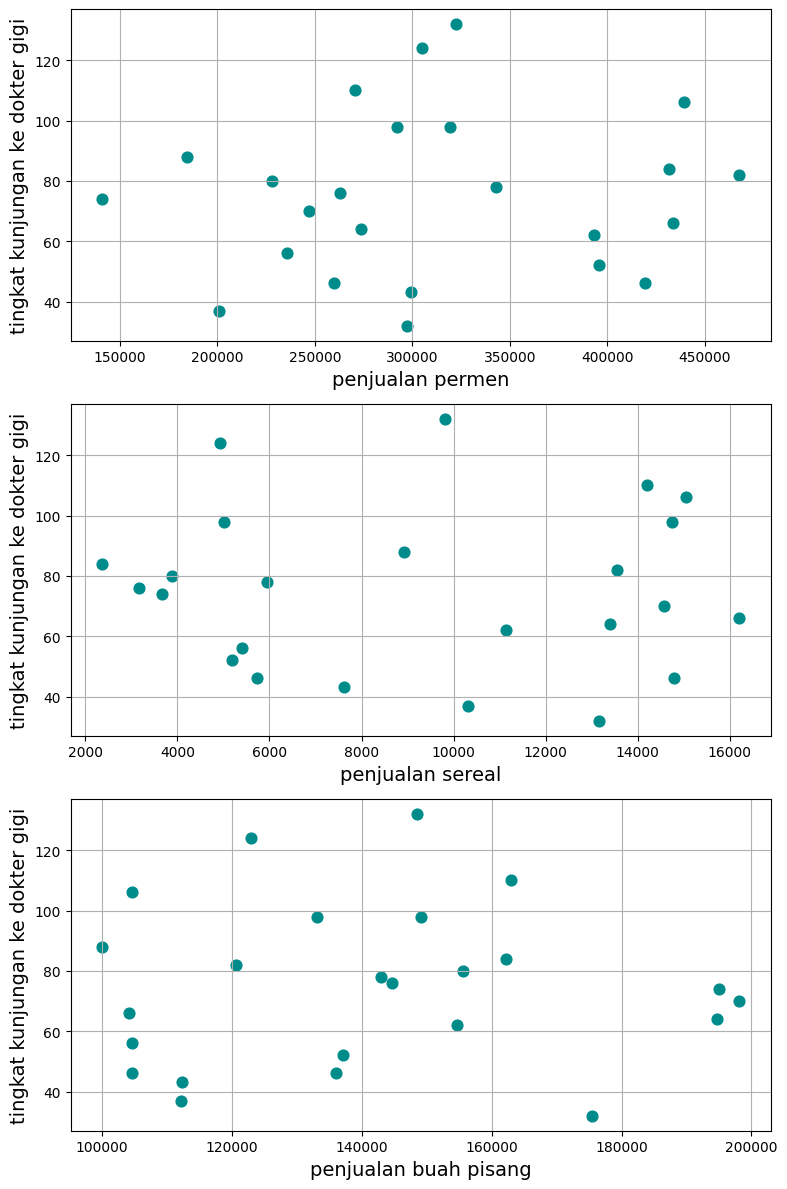

In [8]:
import matplotlib.pyplot as plt
x_cols = df.columns[1:]
y_col = "tingkat kunjungan ke dokter gigi"
fig, axs = plt.subplots(len(x_cols), 1, figsize=(8,12))
for ax, x_col in zip(axs, x_cols):
    df.plot.scatter(x=x_col, y=y_col, c="darkcyan", s=60, ax=ax)
    ax.set_xlabel(x_col, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)
    ax.grid()
plt.tight_layout()
plt.show

In [9]:
print("koefisien korelasi pearson:")
print("--------------------------")
print(df.corr()["tingkat kunjungan ke dokter gigi"])

koefisien korelasi pearson:
--------------------------
tingkat kunjungan ke dokter gigi    1.000000
penjualan permen                    0.083333
penjualan sereal                   -0.027465
penjualan buah pisang               0.028650
Name: tingkat kunjungan ke dokter gigi, dtype: float64


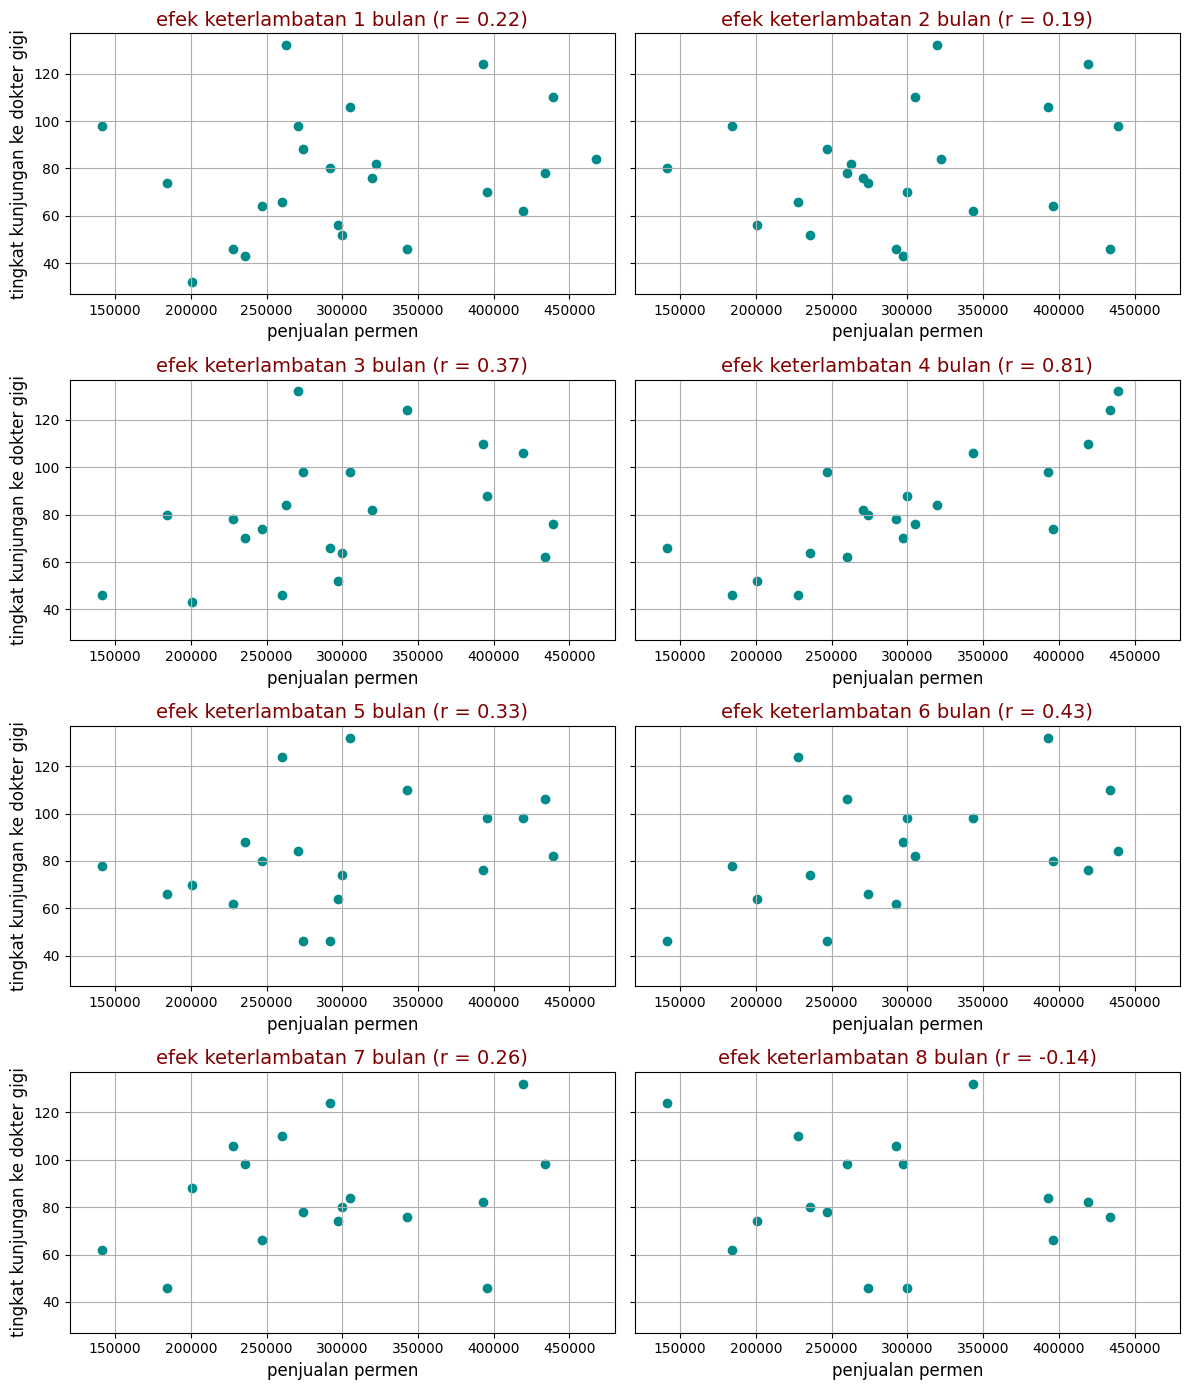

In [16]:
from scipy import stats

n_delays = 8
n_plt_cols = 2
fig, axs = plt.subplots(round(n_delays/2), n_plt_cols, figsize=(12, 3.5*round(n_delays/2)), sharey=True)
for i in range(n_delays):
    x =df["penjualan permen"][:-(i+1)]
    y = df["tingkat kunjungan ke dokter gigi"][i+1:]
    pearson_r, p_value = stats.pearsonr(x,y)
    title = "efek keterlambatan %d bulan (r = %.2f)" % (i+1, pearson_r)
    
    ax = axs[i // n_plt_cols][i % n_plt_cols]
    ax.scatter(x,y, c="darkcyan")
    ax.set_title(title, fontsize=14, color="maroon")
    if i % n_plt_cols == 0:
        ax.set_ylabel("tingkat kunjungan ke dokter gigi", fontsize=12)
    ax.set_xlabel("penjualan permen", fontsize=12)
    ax.set_xlim([120000,480000])
    ax.grid()
plt.tight_layout()
plt.show()

In [17]:
import numpy as np

# Mengambil variabel bebas dan bergantung dari df untuk keterlambatan 4 bulan
# dan mengubahnya menjadi numpy 1D array
X = df["penjualan permen"][:-4].to_numpy()
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy()

# Menghitung nilai rata-rata variabel bebas dan bergantung
x_mean = X.mean()
y_mean = y.mean()

# Menghitung nilai pembilang dan penyebut untuk m
b_pembilang = ((X - x_mean) * (y - y_mean)).sum()
b_penyebut = ((X - x_mean) ** 2).sum()

# Menghitung nilai koefisien regresi linier
b = b_pembilang / b_penyebut
a = y_mean - b * x_mean

print("Persamaan regresi linier: y = %.4f + %.4ex" % (a, b))


Persamaan regresi linier: y = 12.9341 + 2.3035e-04x


In [18]:
# Ambil data variabel bebas yang belum digunakan
x_new = df["penjualan permen"][-4:].to_numpy()

# Gunakan x_new dalam persamaan regresi
y_pred = a + b * x_new

print("Prediksi tingkat kunjungan ke dokter gigi 2020-01 s/d 2020-04:")
for i, kunjungan in enumerate(y_pred):
    print("2020-0%d: %4d kunjungan." % (i+1, round(kunjungan)))


Prediksi tingkat kunjungan ke dokter gigi 2020-01 s/d 2020-04:
2020-01:   73 kunjungan.
2020-02:   87 kunjungan.
2020-03:  121 kunjungan.
2020-04:  112 kunjungan.


In [ ]:
# Berikut adalah kesimpulan dari setiap bagian:

# 1. Visualisasi Scatter Plot:
#    Kode ini menggunakan library Matplotlib untuk membuat scatter plot yang menunjukkan hubungan antara kolom penjualan permen dan tingkat kunjungan ke dokter gigi. Scatter plot digambarkan untuk setiap kolom penjualan permen. Data ditampilkan dalam warna dark cyan dengan ukuran titik sebesar 60. Grafik-garafik tersebut dikelompokkan dalam subplots vertikal dengan ukuran gambar 8x12.

# 2. Koefisien Korelasi Pearson:
#    Kode ini menghitung dan mencetak koefisien korelasi Pearson antara kolom "tingkat kunjungan ke dokter gigi" dengan kolom lainnya pada dataframe. Nilai koefisien korelasi Pearson memberikan informasi tentang kekuatan dan arah hubungan linier antara dua variabel. Koefisien berkisar antara -1 hingga 1, di mana nilai positif menunjukkan hubungan positif, nilai negatif menunjukkan hubungan negatif, dan semakin dekat nilai dengan 1 atau -1 menunjukkan hubungan yang semakin kuat.

# 3. Analisis Regresi Linier:
#    Kode ini melakukan analisis regresi linier antara variabel bebas "penjualan permen" dan variabel tergantung "tingkat kunjungan ke dokter gigi". Menggunakan metode regresi linier, kode menghitung koefisien regresi (slope) dan intercept. Hasilnya dicetak dalam bentuk persamaan regresi linier, yang memberikan perkiraan nilai variabel tergantung berdasarkan variabel bebas. Persamaan tersebut adalah "y = a + bx", di mana "a" adalah intercept dan "b" adalah koefisien regresi.

# 4. Prediksi Tingkat Kunjungan:
#    Kode ini menggunakan persamaan regresi linier yang telah dihitung sebelumnya untuk melakukan prediksi tingkat kunjungan ke dokter gigi pada periode 2020-01 hingga 2020-04. Menggunakan variabel bebas "penjualan permen" pada periode tersebut, kode menghasilkan prediksi tingkat kunjungan dan mencetaknya dengan format "YYYY-MM: X kunjungan", di mana X adalah angka bulat.

# Keseluruhan, kode yang saya tuliskan menggabungkan analisis visualisasi data, korelasi, regresi linier, dan prediksi. Ini membantu memahami hubungan antara variabel "penjualan permen" dan "tingkat kunjungan ke dokter gigi" serta memperoleh persamaan regresi untuk memprediksi tingkat kunjungan di masa depan.